<a href="https://colab.research.google.com/github/GoshenEngineer/first-repo/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DEPENDENCIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# importing the performance evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

Data Collection and Processing

In [ ]:
#loading the dataset to the Pandas
df = pd.read_csv('/content/cardekho_dataset.csv', index_col = 0)
pd.set_option('display.max_columns', None)
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [ ]:
#checking the first ten rows of the dataset
df.head(10)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
5,Maruti Wagon R,Maruti,Wagon R,8,35000,Individual,Petrol,Manual,18.90,998,67.10,5,350000
6,Hyundai i10,Hyundai,i10,8,40000,Dealer,Petrol,Manual,20.36,1197,78.90,5,315000
7,Maruti Wagon R,Maruti,Wagon R,3,17512,Dealer,Petrol,Manual,20.51,998,67.04,5,410000
8,Hyundai Venue,Hyundai,Venue,2,20000,Individual,Petrol,Automatic,18.15,998,118.35,5,1050000
12,Maruti Swift,Maruti,Swift,4,28321,Dealer,Petrol,Manual,16.60,1197,85.00,5,511000


In [ ]:
df2=df.copy()

In [ ]:
#printing the last 10 rows of the dataset
df.tail(10)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
19531,Maruti Swift,Maruti,Swift,3,25000,Individual,Petrol,Automatic,22.00,1197,81.80,5,590000
19533,Honda Amaze,Honda,Amaze,6,28000,Dealer,Diesel,Manual,25.80,1498,98.60,5,525000
19534,Renault KWID,Renault,KWID,2,2700,Dealer,Petrol,Manual,25.17,799,53.30,5,395000
19535,Maruti Ertiga,Maruti,Ertiga,5,56829,Dealer,Diesel,Manual,20.77,1248,88.80,7,895000
19536,Hyundai Grand,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5,545000
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [ ]:
# get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


Conclusion from the info: Checking the info of the dataset, the conclusion drawn based on the datatype of each features is that: Most features are object and Integers excluding the mileage and max_power which are in float. The datasets consists of our 13 features in which 6 are categorical(object), 5 are integers(continous) and the remaining features are in float.

In [ ]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

***Variable Description***


In [ ]:
#checking for the numbers of rows and columns in the data Frame#checking for the numbers of rows and columns in the data Frame
df.shape

(15411, 13)

In [ ]:
df.isna().sum()

,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0
engine,0


In [ ]:
#checking for the presence of any missing values in all the columns of the dataset
df.isna().sum()
'''it is deduced that there are no missing values in any of the columns'''

'it is deduced that there are no missing values in any of the columns'

In [ ]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

SPECIFIC FEATURES (CATEGORICAL VARIABLE) ANALYSIS

In [ ]:
#printing out different classes of the transmission types
df['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
#printing out how many transmission types are in the datasets
df['transmission_type'].nunique()

2

In [ ]:
df.head(5)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
#printing out different classes of the sellers types
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
#printing out how many seller types are in the datasets
df['seller_type'].nunique()

3

In [ ]:
#printing out different classes of the fuel types
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
#printing out how many fuel types are in the datasets
df['fuel_type'].nunique()

5

In [ ]:
df['model'].nunique()

120

In [ ]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

In [ ]:
df[df['model'] == 'Camry'].count()

,0
car_name,36
brand,36
model,36
vehicle_age,36
km_driven,36
seller_type,36
fuel_type,36
transmission_type,36
mileage,36
engine,36


In [ ]:
df['car_name'].nunique()

121

In [ ]:
df['brand'].nunique()

32

In [ ]:
[df[df['brand'].str.startswith('T')]]

[              car_name   brand     model  vehicle_age  km_driven seller_type  \
 21       Toyota Innova  Toyota    Innova            8     110000  Individual   
 35     Toyota Fortuner  Toyota  Fortuner            8     110000  Individual   
 96          Tata Tiago    Tata     Tiago            4      32100  Individual   
 105      Toyota Innova  Toyota    Innova            5     120000  Individual   
 190         Tata Tiago    Tata     Tiago            5       9500  Individual   
 ...                ...     ...       ...          ...        ...         ...   
 19489       Tata Tiago    Tata     Tiago            4      30000  Individual   
 19498      Tata Safari    Tata    Safari           10     120000  Individual   
 19507    Toyota Innova  Toyota    Innova           12      74000      Dealer   
 19516     Toyota Yaris  Toyota     Yaris            3      41000      Dealer   
 19527    Toyota Innova  Toyota    Innova            3      21265  Individual   
 
       fuel_type transmiss

Data Visualization

In [ ]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


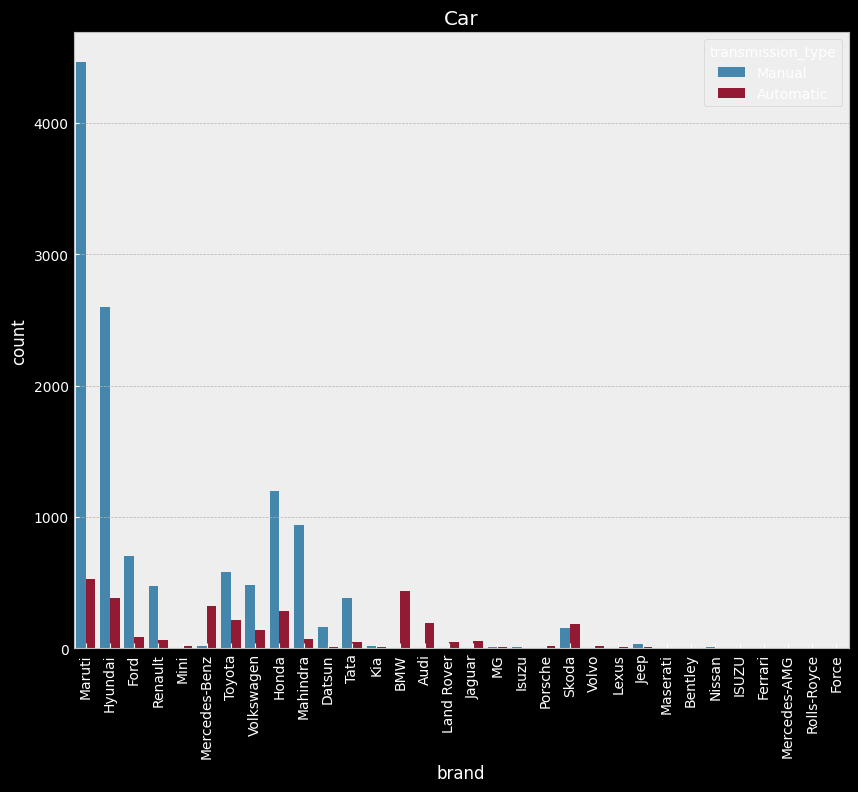

In [ ]:
# let's visualize the condition of the house columnn
plt.figure(figsize=(10,8))
sns.countplot(x='brand', data=df, hue = 'transmission_type')
plt.title('Car')
plt.xticks(rotation = 'vertical')
#plt.savefig('Condition of the house')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

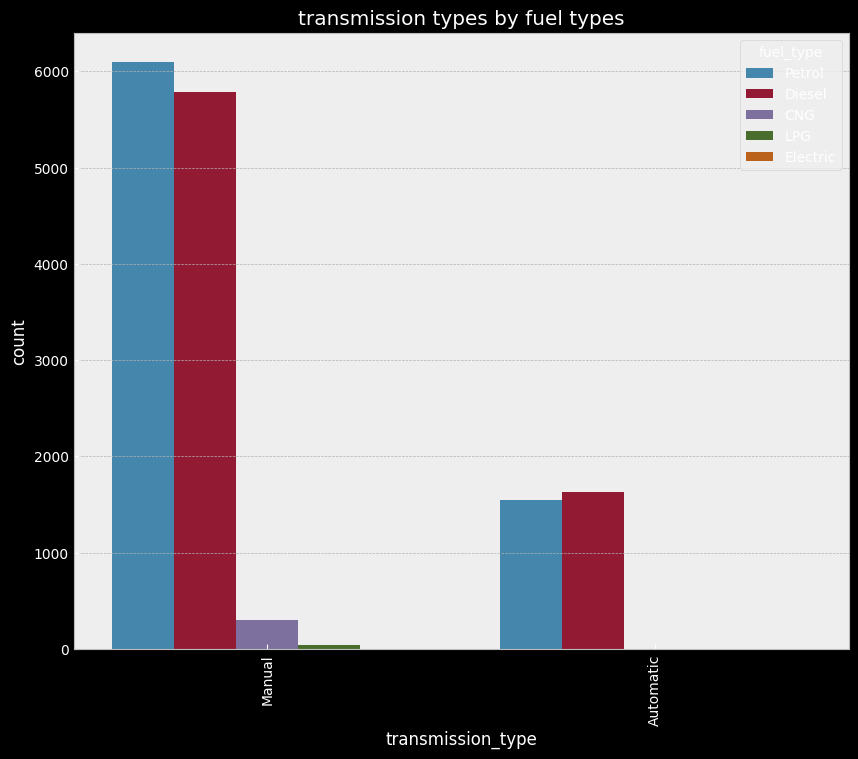

In [ ]:
# let's visualize the different fuel types under the transmission types
plt.figure(figsize=(10,8))
sns.countplot(x='transmission_type', data=df, hue = 'fuel_type')
plt.title('transmission types by fuel types')
plt.xticks(rotation = 'vertical')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

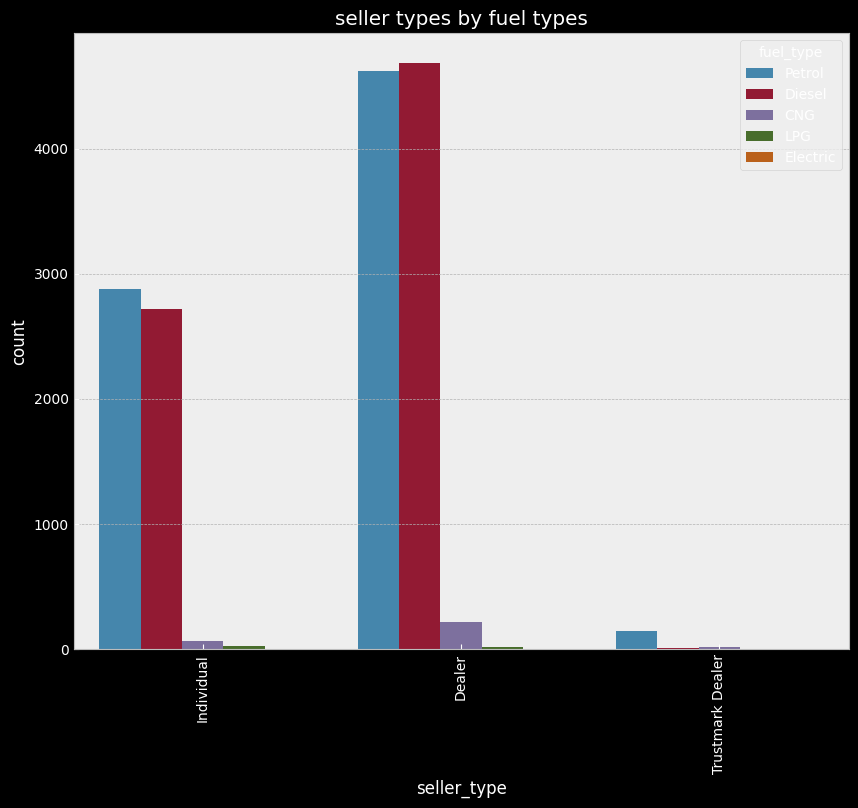

In [ ]:
# let's visualize the different fuel types under the transmission types
plt.figure(figsize=(10,8))
sns.countplot(x='seller_type', data = df, hue = 'fuel_type')
plt.title('seller types by fuel types')
plt.xticks(rotation = 'vertical')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


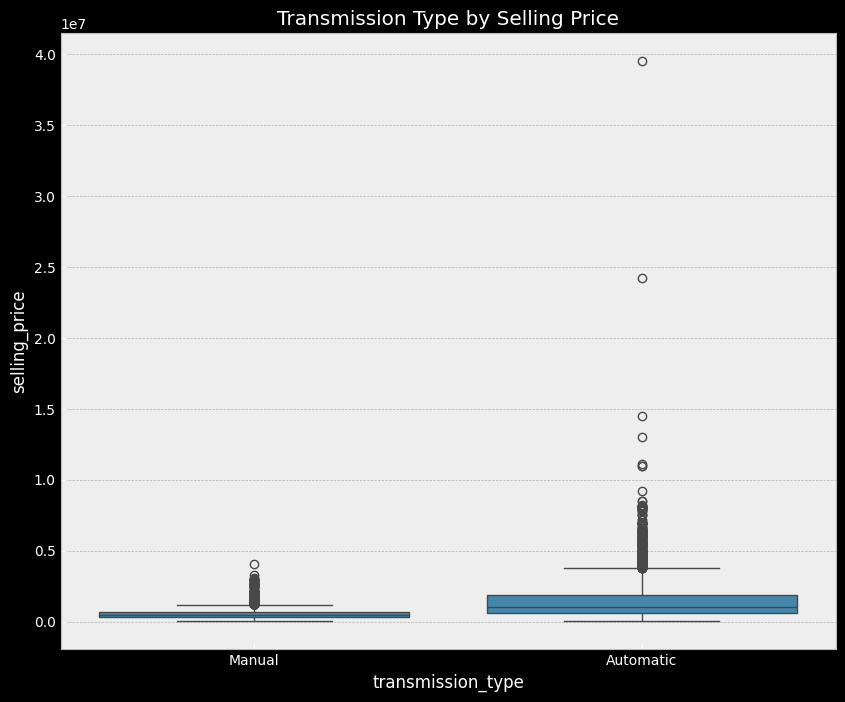

In [ ]:
# visuallize the hypertension variable using boxplot
plt.style.use('bmh')
plt.figure(figsize=(10,8))
sns.boxplot(x='transmission_type', y='selling_price',  data=df)
plt.title('Transmission Type by Selling Price')
plt.show()

DATA CLEANING

LABEL ENCODING

We will be converting some of the categorical features into numerical variables. The features to be converted are:
1. Transmission type
2. Fuel Type
3. Selling type
4. Brand
5. Model
```



In [ ]:
df['fuel_type'].nunique()

5

In [ ]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
df.head(3)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.0,1197,80.0,5,215000


In [ ]:
df['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
df['brand'].nunique()

32

Enconding all the categorical Features

In [ ]:
#importing the encoding library
from sklearn.preprocessing import LabelEncoder

#encoding each of the
brand_en = LabelEncoder()
model_en = LabelEncoder()
seller_type_en = LabelEncoder()
transmissiontype_en = LabelEncoder()
fueltype_en = LabelEncoder()

In [ ]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [ ]:
df['brand'] = brand_en.fit_transform(df['brand'])
df['model'] = model_en.fit_transform(df['model'])
df['seller_type'] = seller_type_en.fit_transform(df['seller_type'])
df['transmission_type'] = transmissiontype_en.fit_transform(df['transmission_type'])
df['fuel_type'] = fueltype_en.fit_transform(df['fuel_type'])

In [ ]:
df.head(2)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,18,7,9,120000,1,4,1,19.7,796,46.3,5,120000
1,Hyundai Grand,8,54,5,20000,1,4,1,18.9,1197,82.0,5,550000


In [ ]:
#printing the first five rows for better visualization
df.head(5)


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,18,7,9,120000,1,4,1,19.70,796,46.30,5,120000
1,Hyundai Grand,8,54,5,20000,1,4,1,18.90,1197,82.00,5,550000
2,Hyundai i20,8,118,11,60000,1,4,1,17.00,1197,80.00,5,215000
3,Maruti Alto,18,7,9,37000,1,4,1,20.92,998,67.10,5,226000
4,Ford Ecosport,6,38,6,30000,0,1,1,22.77,1498,98.59,5,570000


In [ ]:
df['fuel_type']

,fuel_type
0,4
1,4
2,4
3,4
4,1
...,...
19537,4
19540,4
19541,1
19542,1


**Splitting the Independent Variables from the Target Variable**

In [ ]:
df.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [ ]:
#selecting the Important features and dropping the unnecesary ones
selected_features = df.drop(['car_name','selling_price'], axis = 1)

In [ ]:
x = selected_features
y = df['selling_price']

In [ ]:
#print only the target variable
y.head()

,selling_price
0,120000
1,550000
2,215000
3,226000
4,570000


In [ ]:
x.shape, y.shape

((15411, 11), (15411,))

Data Normalization or DataScaling

In [ ]:
scaler = StandardScaler()


In [ ]:
x_scaled = scaler.fit_transform(x)

In [ ]:
#view the x variable
print(x_scaled)

[[ 0.34333041 -1.51971354  0.98356183 ... -1.32425883 -1.26335238
  -0.40302241]
 [-0.89841213 -0.2256934  -0.34393331 ... -0.55471774 -0.43257082
  -0.40302241]
 [-0.89841213  1.53637659  1.64730941 ... -0.55471774 -0.47911321
  -0.40302241]
 ...
 [ 1.46089869  0.4075505  -0.01205952 ...  0.02291783  0.06822523
  -0.40302241]
 [ 0.21915616  1.42624721 -0.34393331 ...  1.32979434  0.91715831
   2.07344426]
 [-1.02258638 -1.02413136 -1.33955467 ...  0.02099878  0.39588361
  -0.40302241]]


In [ ]:
x_scaled.shape

(15411, 11)

SPLITTING THE DATASET INTO TRAINNING AND TEST DATA

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)

(12328, 11) (12328,)


In [ ]:
print(x_test.shape, y_test.shape)

(3083, 11) (3083,)


TRAINING THE XGBREGRESSOR MODEL

In [ ]:
# model training phase
modelx = XGBRegressor()
modelx.fit(x_train, y_train)
'''Model trained successfully using the training data'''

'Model trained successfully using the training data'

In [ ]:
#accuracy prediction of the training data
y_pred = modelx.predict(x_train)

ACCURACY OF THE TRAINING DATA

In [ ]:
#Squared_Error
score_1 = metrics.r2_score(y_train, y_pred)
print('R squared error : ',score_1)

R squared error :  0.9903853535652161


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms = root_mean_squared_error(y_train, y_pred)
print(rms)

88305.29330854329


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_train, y_pred)
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

Mean Absolute Percentage Error: 0.10%


In [ ]:
#accuracy prediction of the testing data
y_pred_test = modelx.predict(x_test)


In [ ]:
#Squared_Error
score_1 = metrics.r2_score(y_test, y_pred_test)
print('R squared error : ', f'{score_1}%')

R squared error :  0.9333919882774353%


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms = root_mean_squared_error(y_test, y_pred_test)
print(rms)

223922.50711668868


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

Mean Absolute Percentage Error: 0.13%


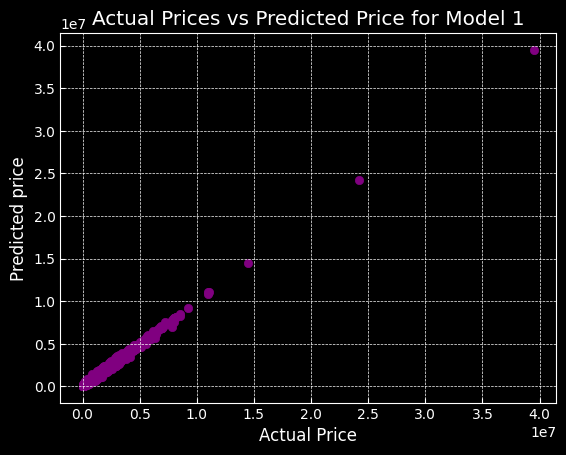

In [ ]:
plt.style.use('dark_background')
plt.scatter(y_train, y_pred, color = 'purple')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual Prices vs Predicted Price for Model 1')
plt.show()

TRAINING THE LINEAR REGRESSION MODEL

In [ ]:
model2 = LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [ ]:
#accuracy prediction of the training data
y_pred2 = model2.predict(x_train)

ACCURACY OF THE LINEAR REGRESSION MODEL

In [ ]:
#Squared_Error
score_1 = metrics.r2_score(y_train, y_pred2)
print('R squared error of Model 2: ',score_1)

R squared error of Model 2:  0.6207773194014619


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms = root_mean_squared_error(y_train, y_pred2)
print(f'Root Mean Error for the Model 2: {rms}')

Root Mean Error for the Model 2: 554583.4343003464


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape2 = mean_absolute_percentage_error(y_train, y_pred2)
print(f'Mean Absolute Percentage Error of Model 2: {mape2:.2f}%')

Mean Absolute Percentage Error of Model 2: 0.52%


In [ ]:
#accuracy prediction of the test data
y_pred_test2 = model2.predict(x_test)


ACCURACY OF THE MODEL 2 USING THE TEST DATA

In [ ]:
#Squared_Error
score_1 = metrics.r2_score(y_test, y_pred_test2)
print('R squared error : ', f'{score_1}%')

R squared error :  0.6632239074393393%


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms = root_mean_squared_error(y_test, y_pred_test2)
print(rms)

503506.61361073796


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred_test2)
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

Mean Absolute Percentage Error: 0.54%


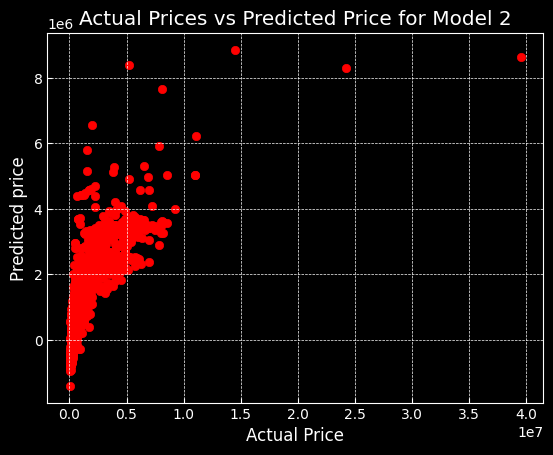

In [ ]:
plt.style.use('fast')
plt.scatter(y_train, y_pred2, color = 'red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual Prices vs Predicted Price for Model 2')
plt.show()

TRAINING THE MODEL 3 USING THE RANDOM FOREST REGRESSOR

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model3 = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model
model3.fit(x_train, y_train)

# Make predictions
y_pred3= model3.predict(x_train)

ACCURACY OF THE RANDOM FOREST REGRESSION MODEL

In [ ]:
#Squared_Error
score_31 = metrics.r2_score(y_train, y_pred3)
print('R squared score of Model 3: ',score_31)

R squared score of Model 3:  0.9727689079874753


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms31 = root_mean_squared_error(y_train, y_pred3)
print(f'Root Mean Error for the Model 3: {rms31}')

Root Mean Error for the Model 3: 148611.44936561855


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape31 = mean_absolute_percentage_error(y_train, y_pred3)
print(f'Mean Absolute Percentage Error of Model 3: {mape31:.2f}%')

Mean Absolute Percentage Error of Model 3: 0.05%


In [ ]:

# Make predictions using the test data
y_pred_test3= model3.predict(x_test)

ACCURACY OF THE MODEL 3 USING THE TEST DATA

In [ ]:
#Squared_Error
score_32 = metrics.r2_score(y_test, y_pred_test3)
print('R squared  : ', f'{score_32}%')

R squared  :  0.9378847675359575%


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms32 = root_mean_squared_error(y_test, y_pred_test3)
print(rms32)

216238.79372250172


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape32 = mean_absolute_percentage_error(y_test, y_pred_test3)
print(f'Mean Absolute Percentage Error: {mape32:.2f}%')

Mean Absolute Percentage Error: 0.14%


TRAINING THE MODEL 3 USING THE RANDOM FOREST REGRESSOR

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model3 = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model
model3.fit(x_train, y_train)

# Make predictions
y_pred3= model3.predict(x_train)

ACCURACY OF THE RANDOM FOREST REGRESSION MODEL

In [ ]:
#Squared_Error
score_31 = metrics.r2_score(y_train, y_pred3)
print('R squared score of Model 3: ',score_31)

R squared score of Model 3:  0.9727689079874753


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms31 = root_mean_squared_error(y_train, y_pred3)
print(f'Root Mean Error for the Model 3: {rms31}')

Root Mean Error for the Model 3: 148611.44936561855


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape31 = mean_absolute_percentage_error(y_train, y_pred3)
print(f'Mean Absolute Percentage Error of Model 3: {mape31:.2f}%')

Mean Absolute Percentage Error of Model 3: 0.05%


In [ ]:

# Make predictions using the test data
y_pred_test3= model3.predict(x_test)

ACCURACY OF THE MODEL 3 USING THE TEST DATA

In [ ]:
#Squared_Error
score_32 = metrics.r2_score(y_test, y_pred_test3)
print('R squared  : ', f'{score_32}%')

In [ ]:
from sklearn.metrics import root_mean_squared_error

rms32 = root_mean_squared_error(y_test, y_pred_test3)
print(rms32)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape32 = mean_absolute_percentage_error(y_test, y_pred_test3)
print(f'Mean Absolute Percentage Error: {mape32:.2f}%')

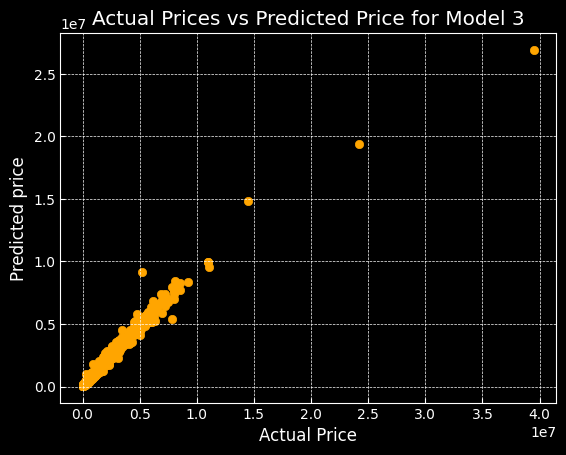

In [ ]:

plt.scatter(y_train, y_pred3, color = 'orange')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual Prices vs Predicted Price for Model 3')
plt.show()

TRAINING THE FOURTH MODEL: DECISON TREE

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
model4 = DecisionTreeRegressor()


In [ ]:
# Train the model
model4.fit(x_train, y_train)

# Making predictions
y_pred4= model4.predict(x_train)

ACCURACY OF THE DECISION TREE REGRESSOR MODEL

In [ ]:
#Squared_Error
score_41 = metrics.r2_score(y_train, y_pred4)
print('R squared score of Model 4: ',score_41)

R squared score of Model 4:  0.9994666998284044


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms41 = root_mean_squared_error(y_train, y_pred4)
print(f'Root Mean Error for the Model 4: {rms41}')

Root Mean Error for the Model 4: 20797.23516567643


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape41 = mean_absolute_percentage_error(y_train, y_pred4)
print(f'Mean Absolute Percentage Error of Model 4: {mape41:.2f}%')

In [ ]:

# Make predictions using the test data
y_pred_test4= model4.predict(x_test)

ACCURACY OF THE MODEL 4 USING THE TEST DATA

In [ ]:
#Squared_Error
score_42 = metrics.r2_score(y_test, y_pred_test4)
print('R squared  : ', f'{score_32}%')

In [ ]:
from sklearn.metrics import root_mean_squared_error

rms42 = root_mean_squared_error(y_test, y_pred_test4)
print(rms42)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape42 = mean_absolute_percentage_error(y_test, y_pred_test4)
print(f'Mean Absolute Percentage Error: {mape42:.2f}%')

In [ ]:
plt.style.use('bmh')
plt.scatter(y_train, y_pred4, color = 'orange')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual Prices vs Predicted Price for Model 4')
plt.show()

In [ ]:
df['fuel_type'].unique()

In [ ]:
#creating variables for each inversed transformed features
a=df['brand'].unique()
CarBrand=brand_en.inverse_transform(a)

b=df['model'].unique()
CarModel=model_en.inverse_transform(b)

c=df['seller_type'].unique()
CarSeller=seller_type_en.inverse_transform(c)

d=df['transmission_type'].unique()
CarTransmission_Type=transmissiontype_en.inverse_transform(d)

e=df['fuel_type'].unique()
CarFuel=fueltype_en.inverse_transform(e)

In [ ]:
#creating a new list for each features
carbrand=list(zip(CarBrand,a))
print(carbrand)
carmodel=list(zip(CarModel,b))
print(carmodel)
seller=list(zip(CarSeller,c))
print(seller)
transmission=list(zip(CarTransmission_Type,d))
print(transmission)
fuel=list(zip(CarFuel,e))
print(fuel)

[('Maruti', 18), ('Hyundai', 8), ('Ford', 6), ('Renault', 25), ('Mini', 22), ('Mercedes-Benz', 21), ('Toyota', 29), ('Volkswagen', 30), ('Honda', 7), ('Mahindra', 17), ('Datsun', 3), ('Tata', 28), ('Kia', 13), ('BMW', 1), ('Audi', 0), ('Land Rover', 14), ('Jaguar', 11), ('MG', 16), ('Isuzu', 10), ('Porsche', 24), ('Skoda', 27), ('Volvo', 31), ('Lexus', 15), ('Jeep', 12), ('Maserati', 19), ('Bentley', 2), ('Nissan', 23), ('ISUZU', 9), ('Ferrari', 4), ('Mercedes-AMG', 20), ('Rolls-Royce', 26), ('Force', 5)]
[('Alto', 7), ('Grand', 54), ('i20', 118), ('Ecosport', 38), ('Wagon R', 100), ('i10', 117), ('Venue', 96), ('Swift', 88), ('Verna', 97), ('Duster', 32), ('Cooper', 29), ('Ciaz', 24), ('C-Class', 16), ('Innova', 60), ('Baleno', 13), ('Swift Dzire', 89), ('Vento', 95), ('Creta', 30), ('City', 25), ('Bolero', 14), ('Fortuner', 45), ('KWID', 64), ('Amaze', 10), ('Santro', 84), ('XUV500', 114), ('KUV100', 63), ('Ignis', 59), ('RediGO', 78), ('Scorpio', 85), ('Marazzo', 68), ('Aspire', 11)

In [ ]:
import ipywidgets as widgets

In [ ]:
Brand=widgets.Dropdown(
    options=sorted(carbrand),
    value = 0,
    description='Brand',
)
Model=widgets.Dropdown(
    options=sorted(carmodel),
    value = 2,
    description='Model',
)


Seller=widgets.Dropdown(
    options=seller,
    value = 0,
    description='Seller Type:',
)

Fuel=widgets.Dropdown(
    options=fuel,
    value = 4,
    description='Fuel:',
)

Transmission=widgets.Dropdown(
    options=transmission,
    value = 0,
    description='Transmission:',
)
Age=widgets.BoundedIntText(
    value=3,
    min=1,
    max=29,
    step=1,
    description='Vehicle Age:',
    disabled=False
)
Mileage=widgets.FloatText(
    value=17,
    min=1,
    step=1,
    description='Mileage (MPG):',
    disabled=False
)
Engine=widgets.IntText(
    value=1500,
    min=0,
    step=1,
    description='Engine(CC):',
    disabled=False
)
MaxPower=widgets.FloatText(
    value=121,
    min=1,
    step=1,
    description='Max Power(HP):',
    disabled=False
)
KM=widgets.FloatText(
    value=10000,
    min=0,
    step=1,
    description='KM Driven:',

)
Seats=widgets.IntSlider(
    value=5,
    min=2,
    max=10,
    step=1,
    description='Seats:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

Building the Predictive System

In [ ]:
from IPython.display import clear_output

In [ ]:
predict_button = widgets.Button(description="Predict Price")
clear_button= widgets.Button(description='Clear')

#creating the predicted_price function
def predict_price(button):
  clear_output
  #creating a variable for the value of each features
  brand = Brand.value
  model = Model.value
  seller_type = Seller.value
  fuel_type = Fuel.value
  transmission_type = Transmission.value
  vehicle_age = Age.value
  mileage = Mileage.value
  engine = Engine.value
  max_power = MaxPower.value
  km_driven = KM.value
  seats = Seats.value

  props = [[brand, model, vehicle_age, km_driven,seller_type, fuel_type, transmission_type, mileage, engine, max_power, seats]]

  #converting the list and its values into a DataFrame
  props = pd.DataFrame(props, columns=['brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power','seats'])

  #prediction for each of the model
  XGBRegressor_price = modelx.predict(props)
  linearRegressor_price = model2.predict(props)
  randomForest_price = model3.predict(props)
  decision_price = model4.predict(props)


  print(f"\nThe predicted selling price using XGBoost Regressor model is {XGBRegressor_price[0]:.2f}")
  print(f"\nThe predicted selling price using Linear Regressor model is {linearRegressor_price[0]:.2f}")
  print(f"\nThe predicted selling price using Random Forest Regressor model is {randomForest_price[0]:.2f}")
  print(f"\nThe predicted selling price is Decision Tree Regression model is {decision_price[0]:.2f}")
  print(f'\noverall price is',(XGBRegressor_price[0] + linearRegressor_price[0]+ randomForest_price[0]+ decision_price[0])/4)

def clear(button):
  clear_output()
  display(Brand, Model, Seller, Fuel, Transmission, Age, Mileage, Engine, MaxPower,KM, Seats, predict_button,clear_button)
clear_button.on_click(clear)

predict_button.on_click(predict_price)
display(Brand, Model, Seller, Fuel, Transmission, Age, Mileage, Engine, MaxPower,KM, Seats, predict_button,clear_button)

Dropdown(description='Brand', options=(('Audi', 0), ('BMW', 1), ('Bentley', 2), ('Datsun', 3), ('Ferrari', 4),…

Dropdown(description='Model', index=2, options=(('3', 0), ('5', 1), ('6', 2), ('7', 3), ('A4', 4), ('A6', 5), …

Dropdown(description='Seller Type:', index=1, options=(('Individual', 1), ('Dealer', 0), ('Trustmark Dealer', …

Dropdown(description='Fuel:', options=(('Petrol', 4), ('Diesel', 1), ('CNG', 0), ('LPG', 3), ('Electric', 2)),…

Dropdown(description='Transmission:', index=1, options=(('Manual', 1), ('Automatic', 0)), value=0)

BoundedIntText(value=3, description='Vehicle Age:', max=29, min=1)

FloatText(value=17.0, description='Mileage (MPG):', step=1.0)

IntText(value=1500, description='Engine(CC):')

FloatText(value=121.0, description='Max Power(HP):', step=1.0)

FloatText(value=10000.0, description='KM Driven:', step=1.0)

IntSlider(value=5, continuous_update=False, description='Seats:', max=10, min=2)

Button(description='Predict Price', style=ButtonStyle())

Button(description='Clear', style=ButtonStyle())